In [1]:
import yfinance as yf
import pandas as pd
import os
sp500 = yf.download("^GSPC")
#sp500 = sp500.history(period="max")
#sp500 = pd.read_csv("sp500.csv", index_col=0)
sp500


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-05-13,5233.080078,5237.259766,5211.160156,5221.419922,5221.419922,4255710000
2024-05-14,5221.100098,5250.370117,5217.979980,5246.680176,5246.680176,4763580000
2024-05-15,5263.259766,5311.759766,5263.259766,5308.149902,5308.149902,4360810000


In [2]:
sp500.index = pd.to_datetime(sp500.index)
sp500.index

DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06', '1928-01-09', '1928-01-10', '1928-01-11',
               '1928-01-12', '1928-01-13',
               ...
               '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09',
               '2024-05-10', '2024-05-13', '2024-05-14', '2024-05-15',
               '2024-05-16', '2024-05-17'],
              dtype='datetime64[ns]', name='Date', length=24211, freq=None)

<Axes: xlabel='Date'>

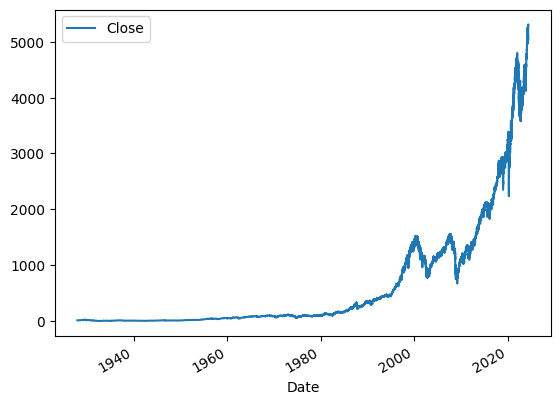

In [3]:
sp500.plot.line(y="Close", use_index = True)

In [4]:
#del sp500["Dividends"]
#del sp500["Stock Splits"]
del sp500["Adj Close"]

In [5]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-13,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176
2024-05-14,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902
2024-05-15,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098


In [205]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-13,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1
2024-05-14,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0


In [206]:
sp500 = sp500.loc["1990-01-01":"2024-01-01"].copy()
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000,1
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1


In [207]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume" , "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [208]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5573770491803278

<Axes: xlabel='Date'>

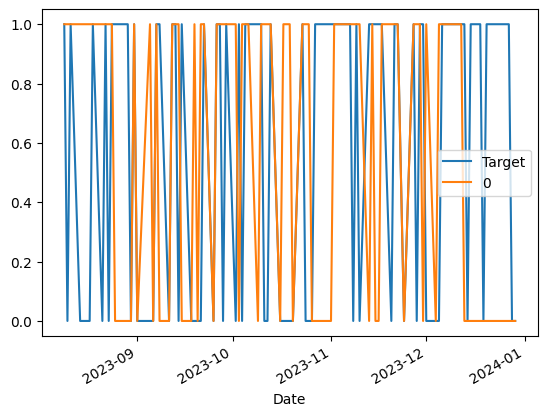

In [209]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

In [210]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined


In [211]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)
        

In [212]:
predictions = backtest(sp500,model,predictors)

In [213]:
predictions["Predictions"].value_counts()

Predictions
0    3469
1    2596
Name: count, dtype: int64

In [214]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [215]:
predictions["Target"].value_counts()/len(predictions)

Target
1    0.534542
0    0.465458
Name: count, dtype: float64

In [216]:
horizons = [2,5,60,250,1000]
new_predictors = []

for x in horizons:
    rolling_avg = sp500.rolling(x).mean()
    
    ratio_col = f"Close_Ratio_{x}"
    sp500[ratio_col] = sp500["Close"] / rolling_avg["Close"]
    
    trend_col = f"Trend_{x}"
    sp500[trend_col] = sp500.shift(1).rolling(x).sum()["Target"]
    
    new_predictors += [ratio_col, trend_col]

In [217]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000,1,1.000829,2.0,1.002720,4.0,1.070590,37.0,1.113889,135.0,1.199129,529.0
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1,1.002111,2.0,1.005513,4.0,1.073161,38.0,1.117612,136.0,1.203740,529.0
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.072714,38.0,1.118166,137.0,1.204993,530.0


In [218]:
model = RandomForestClassifier(n_estimators =200, min_samples_split=50, random_state=1)

In [219]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [220]:
predictions = backtest(sp500,model,new_predictors)

In [221]:
predictions["Predictions"].value_counts()

Predictions
0.0    5052
1.0    1013
Name: count, dtype: int64

In [222]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5429417571569596